<div style='text-align: center; padding: 30px'>
  <h1><strong>Preparación de los Datos y Análisis de Datos</strong></h1>
  <h3><strong>Heri</strong></h1>
</div>

**Objetivo**

Realizar el proceso de preparación de datos del modelo CRISP-DM y aplicar un proceso de análisis de datos.

**Instrucciones**

1. Elige un tema de análisis basado en los datos de ENSANUT 2023.
2. Diseña una ruta de trabajo para realizar el análisis propuesto (20%).
3. Realiza el análisis de datos y presenta tus resultados (80%).

**Nota**  

La preparación de datos debe incluir:
- Proceso de limpieza de datos.
- Estandarización, normalización o transformación de datos.
- Imputación de valores faltantes usando `KKImputer` o `SimpleImputer` de `sklearn`.

El análisis de datos debe incluir:  
- Árbol de decisión.
- Prueba de chi2.
- Histogramas univariados o bivariados con KDE.
- Visualización de datos (por lo menos 2 gráficas diferentes).


**Entregables**  

- Ruta de trabajo (máximo 2 cuartillas). Entregar antes del 11 de marzo a las 23:59 horas.
- Reporte del proceso de preparación de datos explicando el proceso de limpieza y transformación de datos. Debes incluir aquellas variables donde se hayan identificado valores faltantes y el tipo de valor faltante (MCAR; NMCAR, MAR).
- Una presentación de 10 minutos explicando los resultados del análisis (19 de marzo).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Data**

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
hogar = pd.read_csv('hogar_ensanut2023_w_n.csv', encoding='latin1', sep=';')    #  latín1 es el encoding para español
adultos = pd.read_csv('adultos_ensanut2023_w_n.csv', encoding='latin1', sep=';')    # sep=';' es para que lea el archivo csv, porque por default es ','
integrantes = pd.read_csv('integrantes_ensanut2023_w_n.csv', encoding='latin1', sep=';')

C:\Users\herie\AppData\Local\Temp\ipykernel_38340\3218347991.py:3: DtypeWarning: Columns (9,10,11,12,249) have mixed types. Specify dtype option on import or set low_memory=False.
  integrantes = pd.read_csv('integrantes_ensanut2023_w_n.csv', encoding='latin1', sep=';')


In [4]:
hogar.rename(columns={'ï»¿FOLIO_I': 'FOLIO_I'}, inplace=True)   #  renombrar la columna 'ï»¿FOLIO_I' a 'FOLIO_I'

In [5]:
merge = pd.merge(hogar, adultos, how='inner', on='FOLIO_I')     # unir los dos dataframes por la columna 'FOLIO_I'
merge = pd.merge(merge, integrantes, how='inner', on='FOLIO_I', suffixes=('', '_dup'))  # unir el dataframe resultante con 'integrantes' por la columna 'FOLIO_I' y agregar sufijos a las columnas duplicadas
merge = merge.loc[:, ~merge.columns.str.endswith('_dup')]   # eliminar las columnas duplicadas

In [6]:
empty = [column for column in merge.columns if merge[column].isnull().all()]    #  encontrar columnas vacías
mergefull = merge.drop(columns=empty)   #  eliminar columnas vacías

In [7]:
mergefull.to_csv('mergefull.csv', index=False)   #  guardar el dataframe en un archivo csv

### **Nombres de los plots**

In [8]:
catad = pd.read_excel('adultos_ensanut2023_w_n.Catlogo.xlsx', skiprows=16)  # skiprows=16 es para que no lea las primeras 16 filas
catho = pd.read_excel('hogar_ensanut2023_w_n.Catlogo.xlsx', skiprows=16)  
catin = pd.read_excel('integrantes_ensanut2023_w_n.Catlogo.xlsx', skiprows=16)

In [9]:
cat = pd.concat([catad, catho, catin], ignore_index=True)  #  concatenar los dos dataframes

In [10]:
dictcat = dict(zip(cat['Variable'], cat['Etiqueta']))   #  crear un diccionario con las variables y etiquetas 

In [11]:
import json

# Guardar el diccionario combinado en un archivo JSON
with open('dictcat.json', 'w') as fp:
    json.dump(dictcat, fp)

### **Etiquetas para los histogramas**

In [12]:
etiquetas_adultos = pd.read_excel('adultos_ensanut2023_w_n.Catlogo.xlsx', sheet_name=1, skiprows=16)  # skiprows=16 es para que no lea las primeras 16 filas

etiquetas_adultos = etiquetas_adultos.ffill()   #  rellenar los valores faltantes

# Convertir la segunda columna en nombres 
diccionario_adultos = {}

for _, row in etiquetas_adultos.iterrows():
    valor = row['Valor']  # Nombre de la variable principal
    sub_valor = row[etiquetas_adultos.columns[1]]  # Numero de la segunda columna
    etiqueta = row[etiquetas_adultos.columns[2]]  # Etiqueta
    
    if valor not in diccionario_adultos:
        diccionario_adultos[valor] = {} #   crear un diccionario vacío
    
    diccionario_adultos[valor][sub_valor] = etiqueta    #  agregar la etiqueta al diccionario

In [13]:
etiquetas_hogar = pd.read_excel('hogar_ensanut2023_w_n.Catlogo.xlsx', sheet_name=1, skiprows=16)  # skiprows=16 es para que no lea las primeras 16 filas

etiquetas_hogar.iloc[:, 0] = etiquetas_hogar.iloc[:, 0].ffill()   #  rellenar los valores vacíos con el valor anterior

# Convertir la segunda columna en nombres 
diccionario_hogares = {}

for _, row in etiquetas_hogar.iterrows():
    valor = row['Valor']  # Nombre de la variable principal
    sub_valor = row[etiquetas_hogar.columns[1]]  # Numero de la segunda columna
    etiqueta = row[etiquetas_hogar.columns[2]]  # Etiqueta
    
    if valor not in diccionario_hogares:
        diccionario_hogares[valor] = {}  #  crear un diccionario vacío
    
    diccionario_hogares[valor][sub_valor] = etiqueta    #  agregar la etiqueta al diccionario

In [14]:
etiquetas_integrantes = pd.read_excel('integrantes_ensanut2023_w_n.Catlogo.xlsx', sheet_name=1, skiprows=16)  # skiprows=16 es para que no lea las primeras 16 filas

etiquetas_integrantes.iloc[:, 0] = etiquetas_integrantes.iloc[:, 0].ffill()   #  rellenar los valores vacíos con el valor anterior

# Convertir la segunda columna en nombres
diccionario_integrantes = {}

for _, row in etiquetas_integrantes.iterrows():
    valor = row['Valor']  # Nombre de la variable principal
    sub_valor = row[etiquetas_integrantes.columns[1]]  # Numero de la segunda columna
    etiqueta = row[etiquetas_integrantes.columns[2]]  # Etiqueta
    
    if valor not in diccionario_integrantes:
        diccionario_integrantes[valor] = {}  #  crear un diccionario vacío
    
    diccionario_integrantes[valor][sub_valor] = etiqueta    #  agregar la etiqueta al diccionario

In [15]:
# Combinar los dos diccionarios
diccionario_etiquetas = {**diccionario_adultos, **diccionario_hogares, **diccionario_integrantes}

In [16]:
import json

# Guardar el diccionario combinado en un archivo JSON
with open('diccionario_etiquetas.json', 'w') as file:
    json.dump(diccionario_etiquetas, file)

## **Plots**

In [28]:
import os

# Crear la carpeta 'svg' si no existe
if not os.path.exists('svg'):
    os.makedirs('svg')

In [18]:
palette = sns.color_palette('dark')
palette

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [29]:
def box_plot(column):
    sns.set_style('whitegrid')  # estilo de la grafica
    plt.figure(figsize=(3, 6))
    ax = sns.boxplot(y=mergefull[column], color=palette[0], width=0.6, linewidth=1.5)
    plt.title(dictcat[column] + '\n', fontsize=16, fontweight='bold')
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Valores', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # cuadricula en el eje y
    plt.grid(axis='x', linestyle='--', alpha=0)    # cuadricula en el eje x
    
    sns.despine(left=True)  # quitar el borde izquierdo
    
    plt.savefig(f'svg/boxplot_{column}.svg', bbox_inches='tight')  # guardar la grafica
    plt.show()

In [ ]:
def histograma(column, numerito=False):
    sns.set_style('whitegrid')  # estilo de la grafica
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(mergefull[column], color=palette[0], alpha=0.7, binwidth=1)
    plt.title(dictcat[column] + '\n', fontsize=16, fontweight='bold')
    plt.xlabel("")
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # cuadricula en el eje y
    plt.grid(axis='x', linestyle='--', alpha=0)    # cuadricula en el eje x
    
    if numerito: 
        # agregar etiquetas con el valor de cada barra
        for p in ax.patches:
            ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=6, color='black', xytext=(0, 5), 
                        textcoords='offset points')
        
    sns.despine(left=True)  # quitar el borde izquierdo
    plt.tight_layout()
    plt.savefig(f'svg/histograma_{column}.svg', bbox_inches='tight')  # guardar la grafica
    plt.show()

In [ ]:
def grafico_de_barras(column, plotdesconocido=False, numerito=True):
    sns.set_style('whitegrid')  # estilo de la grafica
    plt.figure(figsize=(6, 6))
    
    vc = mergefull[column].value_counts()  # cuenta los valores de la columna
    etiquetas = [diccionario_etiquetas[column].get(str(tag), 'Desconocido') for tag in vc.index]
    
    if not plotdesconocido:
        # filtrar valores desconocidos, esos son los que no tenian que contastar esa pregunta
        vc = vc[[etiqueta != 'Desconocido' for etiqueta in etiquetas]]
        etiquetas = [etiqueta for etiqueta in etiquetas if etiqueta != 'Desconocido']
    
    ax = vc.plot(kind='bar', color=palette, alpha=0.8, width=1)  # crea el grafico de barras
    plt.title(dictcat[column] + '\n', fontsize=16, fontweight='bold')
    plt.xlabel('')
    plt.xticks(rotation=0, fontsize=10)  # rotacion de las etiquetas del eje x
    ax.set_xticklabels(etiquetas, rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # cuadricula en el eje y
    plt.grid(axis='x', linestyle='--', alpha=0)  # cuadricula en el eje x
    
    # agregar etiquetas con el valor de cada barra
    if numerito:
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), 
                        textcoords='offset points')
    
    sns.despine(left=True)  # quita el borde izquierdo
    plt.savefig(f'svg/grafico_de_barras_{column}.svg', bbox_inches='tight')  # guardar la grafica
    plt.show()

In [ ]:
def heatmap(x, y, categorico=True): # se supone que es para categoricos
    plt.figure(figsize=(10, 6))

    vcx = mergefull[x].value_counts()  # cuenta los valores de la columna
    vcy = mergefull[y].value_counts()  # cuenta los valores de la columna

    cmap = sns.dark_palette('#69d', reverse=False, as_cmap=True)  # matplotli
    ax = sns.heatmap(mergefull.groupby([x, y]).size().unstack(), cmap=cmap, annot=True, fmt='.1f', linewidths=0.5, linecolor='white')
    plt.title(f'Correlación entre {dictcat[x].title()} y {dictcat[y].title()} \n', fontsize=16, fontweight='bold')  # titulo
    plt.xlabel(dictcat[y].title())  # etiqueta eje x
    plt.ylabel(dictcat[x].title())  # etiqueta eje y

    plt.grid(axis='y', linestyle='--', alpha=0.1)
    plt.grid(axis='x', linestyle='--', alpha=0.1)

    plt.xticks(fontsize=8, rotation=90)
    plt.yticks(fontsize=8, rotation=0)
    
    if categorico: 
        ax.set_xticklabels([diccionario_etiquetas.get(y, {}).get(str(tag), 'Desconocido') for tag in vcy.index], rotation=90)
        ax.set_yticklabels([diccionario_etiquetas.get(x, {}).get(str(tag), 'Desconocido') for tag in vcx.index], rotation=0)

    plt.tight_layout()
    plt.savefig(f'svg/heatmap_{x}_{y}.svg', bbox_inches='tight')  # guardar la grafica
        
    plt.show()

In [ ]:
def matriz_correlacion(columns):
    plt.figure(figsize=(12, 10))
    
    corr_matrix = mergefull[columns].corr() # Calcular la matriz de correlación
    
    cmap = sns.diverging_palette(240, 12, as_cmap=True)
    ax = sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt='.2f', linewidths=0.5, linecolor='white')
    
    plt.title('Matriz de Correlación \n', fontsize=16, fontweight='bold')

    yticklabels = [dictcat.get(col, col).title() for col in columns] # diccionario de etiquetas   
    ax.set_xticklabels('')  # que en el eje x no haya etiquetas
    ax.set_yticklabels(yticklabels, fontsize=10, rotation=0) # etiquetas en el eje y

    plt.savefig('svg/matriz_correlacion.svg', bbox_inches='tight')  # bbox para no cortar la grafica

    plt.show()

In [ ]:
def scatter_plot(x, y):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(data=mergefull, x=x, y=y, color=palette[0], alpha=0.15, linewidth=0.1)
    plt.title(f'{dictcat[x].title()} vs {dictcat[y].title()} \n', fontsize=16, fontweight='bold')
    plt.xlabel(dictcat[x].title(), fontsize=12)
    plt.ylabel(dictcat[y].title(), fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)   # cuadricula
    plt.tight_layout()
    sns.despine(left=True)  # quitae l borde izquierdo
    plt.savefig(f'svg/scatter_plot_{x}_{y}.svg', bbox_inches='tight')  # guardar la grafica
    plt.show()

# **Laboratorio**

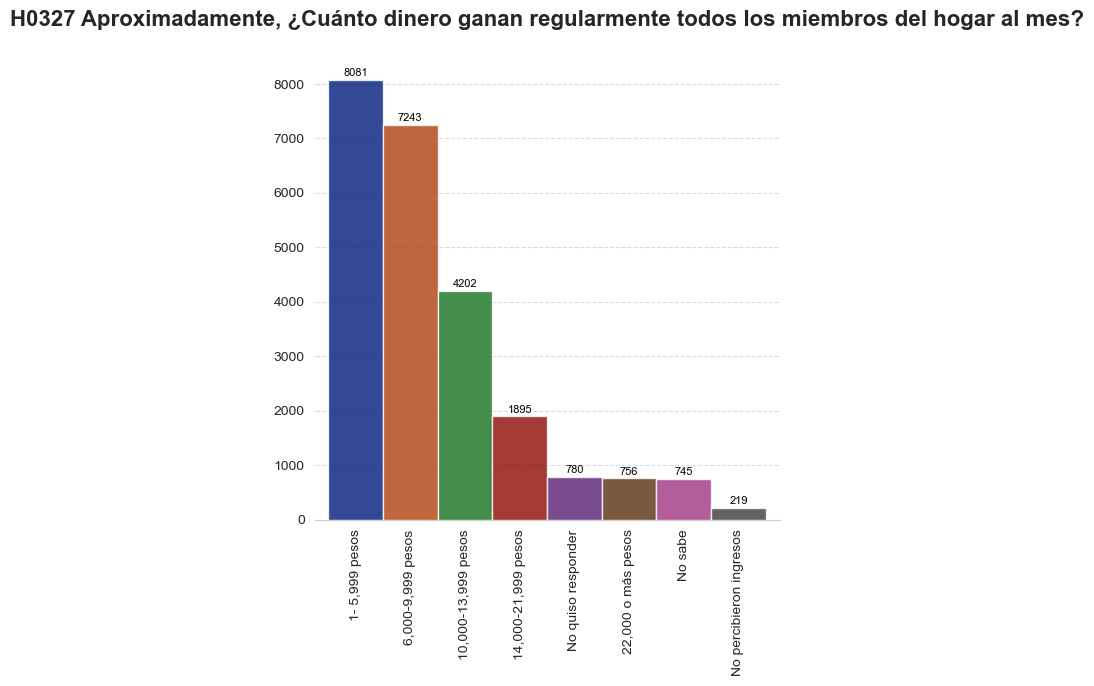

In [25]:
grafico_de_barras('h0327', plotdesconocido=True, numerito=True)

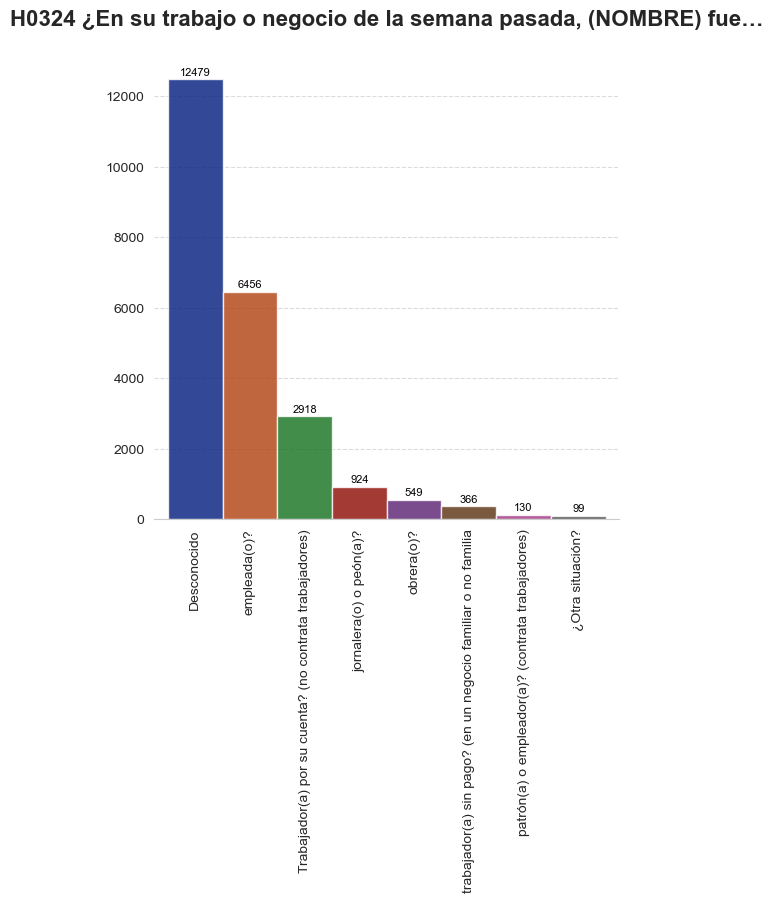

In [26]:
grafico_de_barras('h0324', plotdesconocido=True, numerito=True)

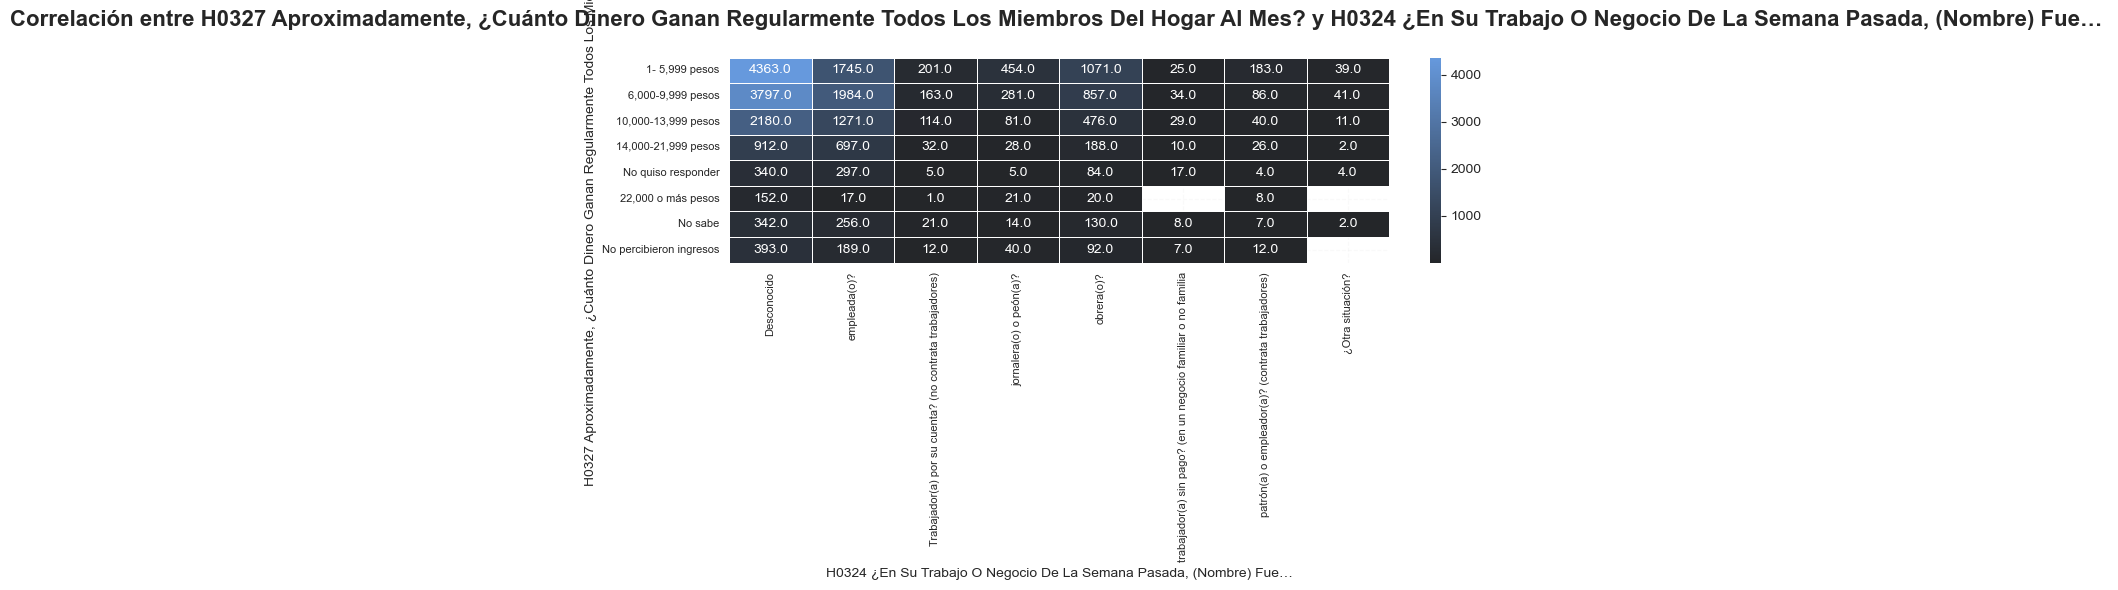

In [27]:
heatmap('h0327', 'h0324', categorico=True)